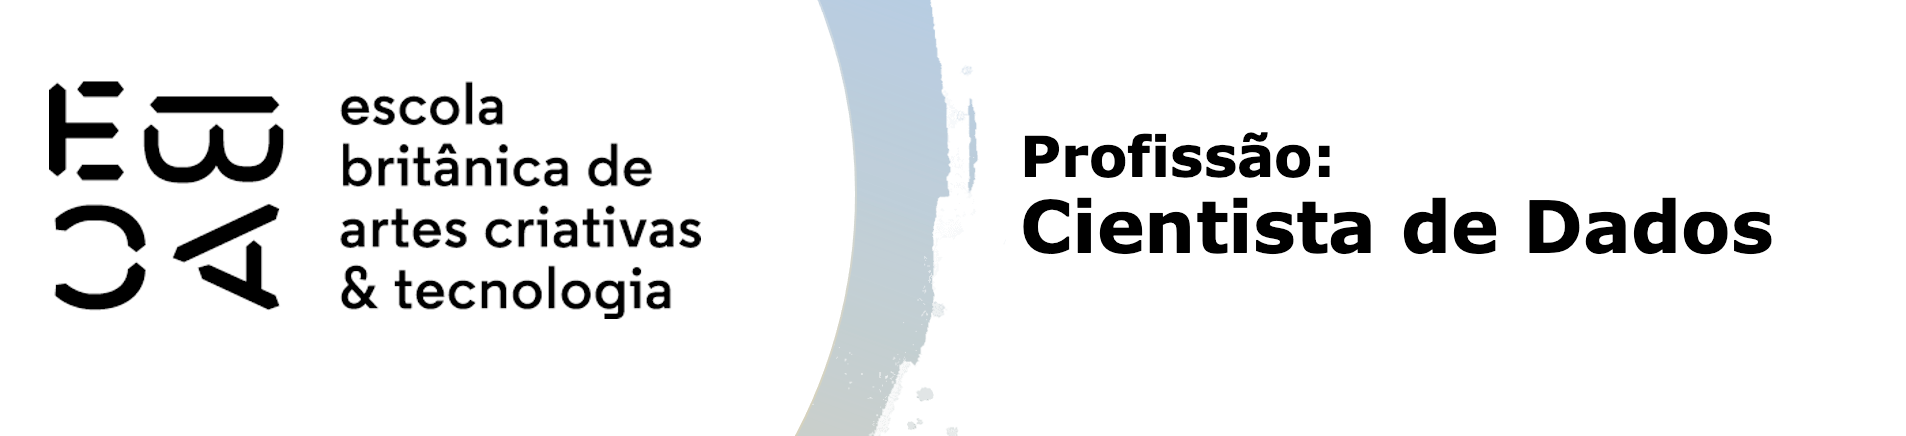

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 29** | K-MEANS | Exercício I

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 13 de outubro de 2024.

---


# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm.notebook         import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
#Resume infomraçoes sobre o DF.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#Retorna uma seria com contagem de valores unicos em cada coluna da DF.
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
#Valores ausentes em cada coluna do DF.
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
#Exibe um resumo incluindo contagem, desvio padrão, média, qurtis e valores minimo e maximo.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
#Exibindo as 6 primeiras colunas.
colunas = df.iloc[:, 0: 6].columns
df[colunas].head(0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration


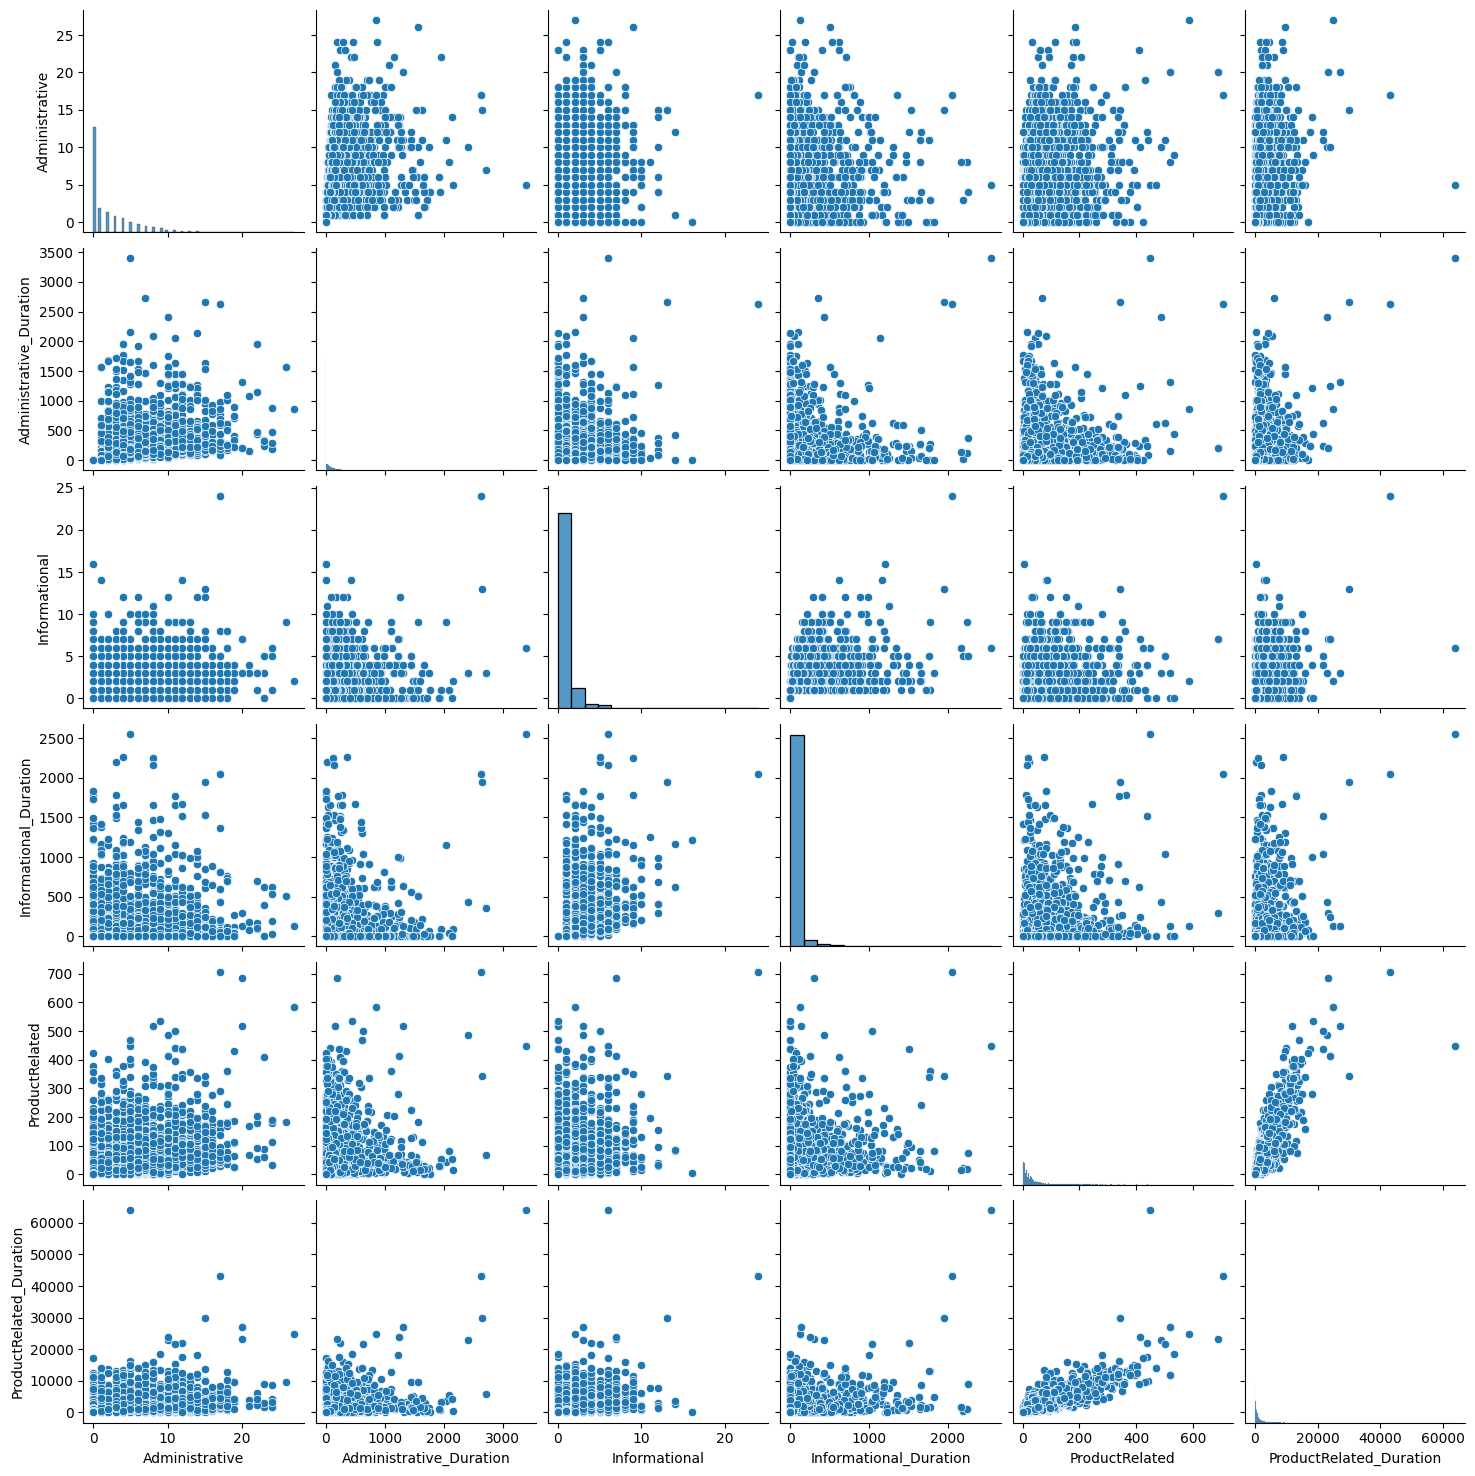

In [10]:
#Gráfico "pairplot" para ver a relaçao entre as 6 primeiras variaveis.
sns.pairplot(data=df[colunas])
plt.show()

> Ao analisar o gráfico, não foram observados agrupamentos significativos nesta primeira avaliação. Contudo, é fundamental destacar que, até agora, não aplicamos nenhuma padronização às variáveis. A ausência dessa padronização pode fazer com que algumas variáveis tenham um impacto maior na distância entre os pontos, dependendo da escala utilizada. Isso pode comprometer a identificação equitativa de agrupamentos, uma vez que variáveis com escalas maiores podem sobrepor aquelas com escalas menores durante o processo de clusterização. Portanto, é aconselhável aplicar a padronização (ou normalização) das variáveis antes de proceder com a clusterização, garantindo que todas tenham um papel igual na formação dos agrupamentos. Essa etapa resultará em uma análise mais justa e precisa dos padrões nos dados, levando a uma clusterização mais confiável e significativa.

### Preparaçao dos dados.

In [11]:
#Gerando uma cópia do DF.
df_pad = df.copy()

#Selecionando as colunas numericas.
colunas_numericas =df_pad.select_dtypes(include = 'number').columns

#Realiza a padronização das colunas numéricas do DataFrame df_pad, substituindo os valores originais nas colunas padronizadas.
#A padronização é feita utilizando a classe StandardScaler do scikit-learn.
#Essa classe ajusta os dados para que tenham média zero e desvio padrão igual a um.
df_pad[colunas_numericas] = pd.DataFrame(data=StandardScaler().fit_transform(df_pad[colunas_numericas]),
                                         columns=df_pad[colunas_numericas].columns)
df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,-1.233426,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,-0.136078,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,2.058618,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,0.961270,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,0.961270,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,2.058618,2.121412,-0.894178,-0.762629,Returning_Visitor,True,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,0.976499,Returning_Visitor,True,False
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,2.218733,Returning_Visitor,True,False
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,-0.136078,-0.207952,-0.061364,1.721839,Returning_Visitor,False,False


In [12]:
#Resumo estatiscito do DF.
df_pad.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,-5.532206e-17,4.610172e-18,1.498306e-17,7.722038e-17,-2.996612e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00


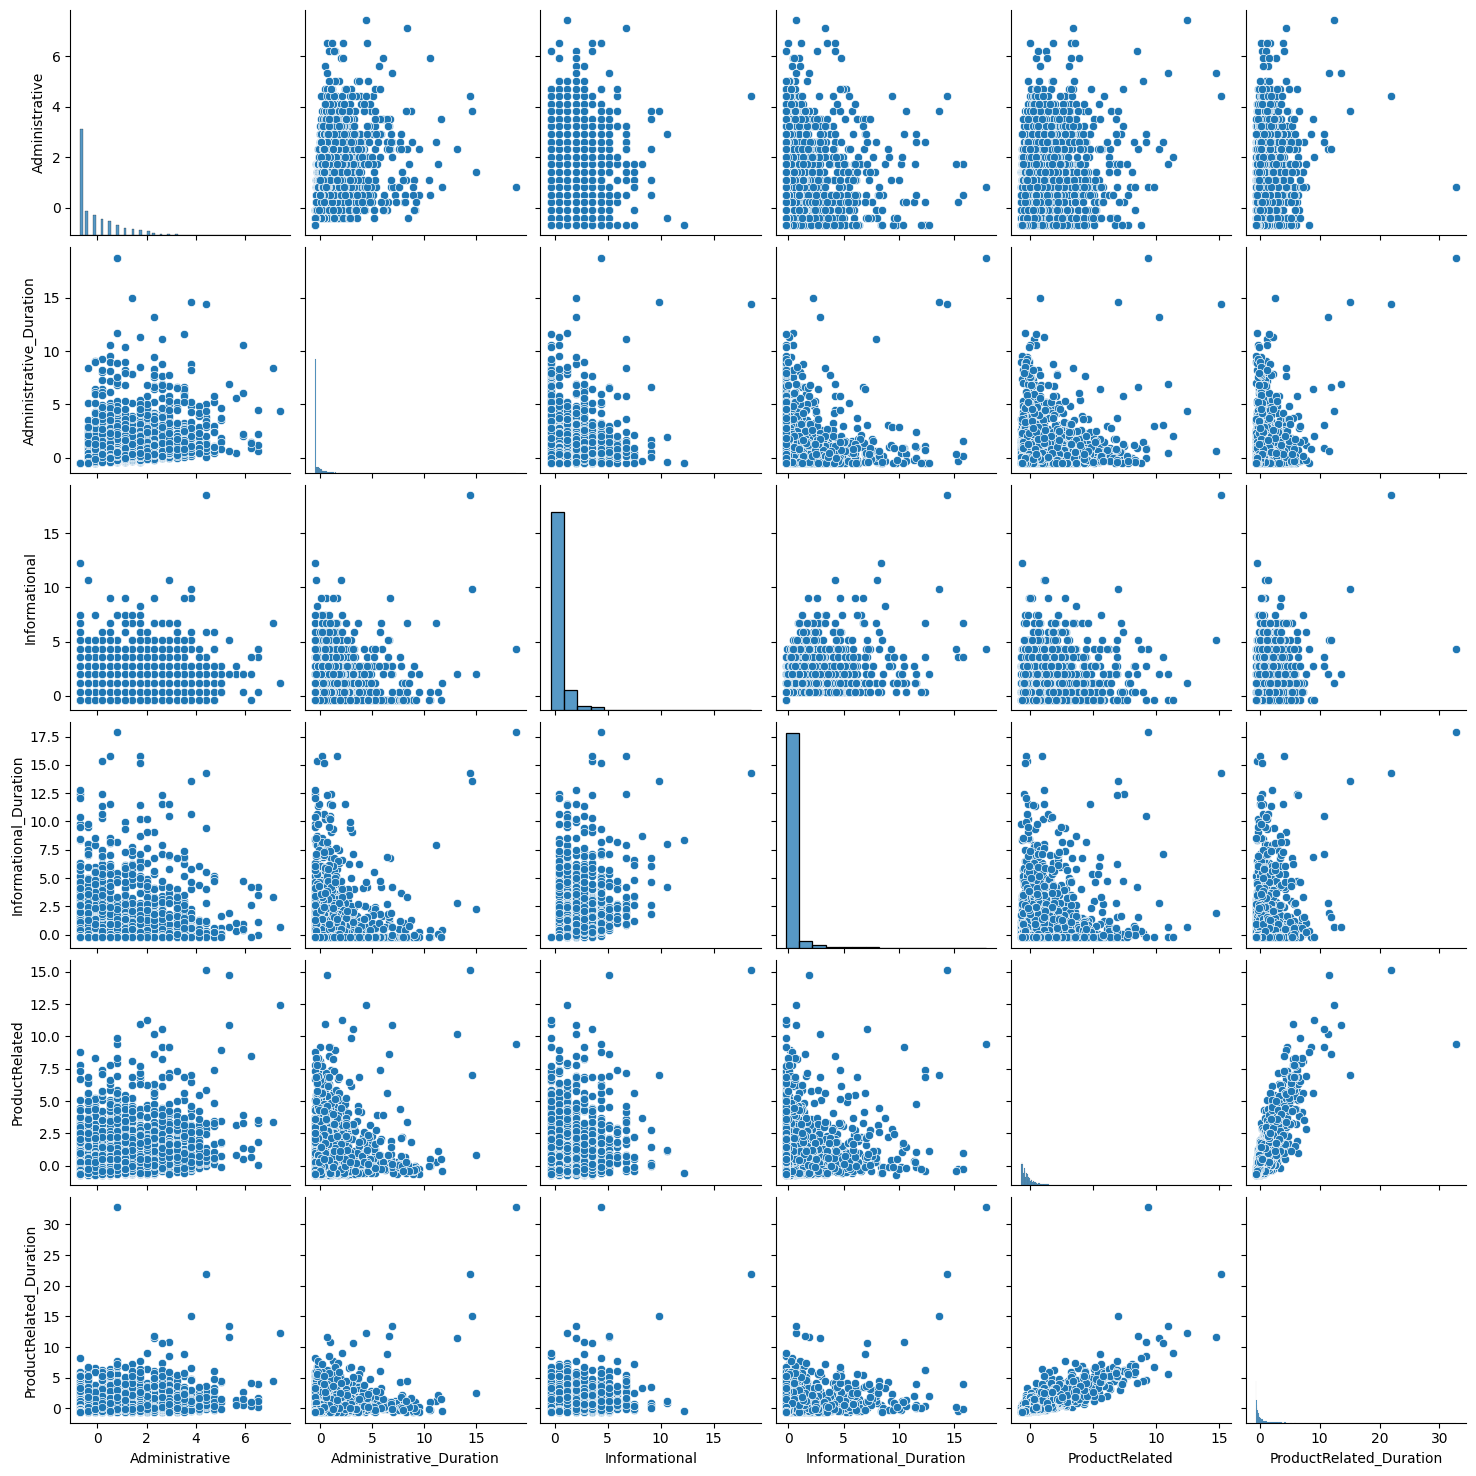

In [13]:
#Plot para vizualizar relaçao entre as variaveis e a padronização.
sns.pairplot(data=df_pad[colunas])
plt.show()

> Após a padronização das variáveis, ainda não se observam agrupamentos visuais relevantes no gráfico. É importante ressaltar que a padronização visa equalizar a influência das variáveis, garantindo que todas desempenhem um papel justo na formação dos agrupamentos. Essa etapa de padronização é apenas o início para se alcançar uma clusterização mais precisa.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

  0%|          | 0/10 [00:00<?, ?it/s]

   n_clusters           SQD
0           1  73980.000000
1           2  51210.558199
2           3  43203.314235
3           4  37353.392878
4           5  33643.805130
5           6  29688.045081
6           7  26878.705821
7           8  25213.202819
8           9  22494.509615
9          10  21085.191087


Text(0.5, 1.0, 'Método do cotovelo para determinar o número de Clusters')

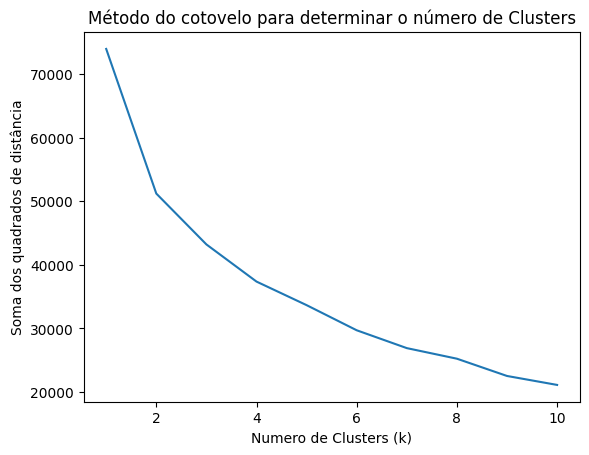

In [19]:
#Armazenando as somas dos quadrados das distâncias.
SQD = []

#Numero maximo de cluster.
K = 10

#Calculando o K-Means para cada valor de k.
for k in tqdm(range(1, K + 1)):
    km = KMeans(n_clusters= k ,
                n_init = 'auto')
    km = km.fit(df_pad[colunas])
    SQD.append(km.inertia_)

#Criando um DF com os valores de K.
df_sqd = pd.DataFrame(data = {'n_clusters': list(range(1, len(SQD)+1)),
                              'SQD':SQD})

#Exibindo o df_sqd.
print(df_sqd)

#Plotando um grafico de vizualização.
plt.plot(df_sqd['n_clusters'],
         df_sqd['SQD'])
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Soma dos quadrados de distância')
plt.title('Método do cotovelo para determinar o número de Clusters')


### Coeficiente da Silhueta.

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.624690
1           3        0.508982
2           4        0.505350
3           5        0.506988
4           6        0.477927
5           7        0.471141
6           8        0.471609
7           9        0.423313
8          10        0.430291


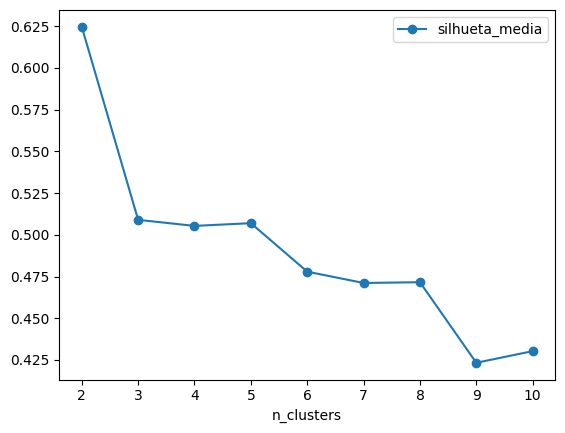

In [26]:
# Inicialização de uma lista vazia para armazenar os valores do Coeficiente da Silhueta.
silhuetas = []

# Número máximo de clusters a serem considerados (de 2 a max_clusters).
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters + 1)):
    
    # Executa o K-Means com o número de clusters atual.
    km = KMeans(n_clusters = n_clusters, 
                n_init = 'auto').fit(df_pad[colunas])
    
    # Calcula o Coeficiente da Silhueta e adiciona à lista 'silhuetas'.
    silhuetas.append(silhouette_score(X = df_pad[colunas], 
                                      labels = km.labels_))

    # Criação de nomes para os grupos identificados pelo K-Means.
    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]
    
    # Adiciona uma nova coluna ao DataFrame df_pad_ com os rótulos dos grupos.
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_, 
                                                                  categories = nomes_grupos)    

# Criação de um DataFrame com os valores do Coeficiente da Silhueta médio para cada número de clusters.
df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)), 
                                   'silhueta_media': silhuetas})
# Exibe o DataFrame com os valores do Coeficiente de Silhueta médio para cada número de clusters.
print(df_silhueta)

# Criação do gráfico de linha para visualização do Coeficiente da Silhueta médio em relação ao número de clusters.
df_silhueta.plot.line(x = 'n_clusters', 
                      y = 'silhueta_media', 
                      marker = 'o')

plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.624080
1           3        0.508982
2           4        0.500190
3           5        0.506252
4           6        0.458314
5           7        0.466038
6           8        0.469875
7           9        0.477592
8          10        0.418837


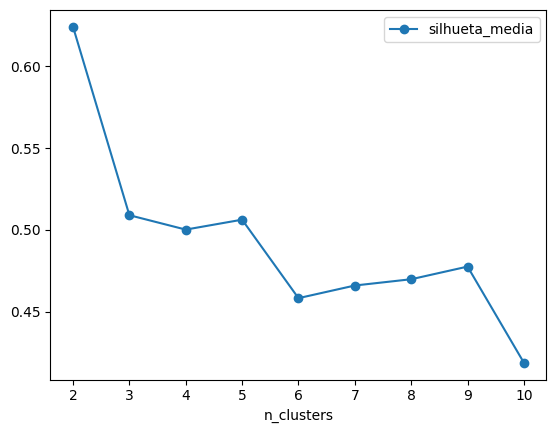

In [28]:
#Lista vazia para armazenar valores.
silhuetas = []

#Maximo de numeros de clusters.
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters + 1)):
    km = KMeans(n_clusters = n_clusters, 
                n_init = 'auto').fit(df_pad[colunas])
    silhuetas.append(silhouette_score(X = df_pad[colunas], 
                                      labels = km.labels_))
    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_, 
                                                                  categories = nomes_grupos)    

df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)), 
                                   'silhueta_media': silhuetas})

print(df_silhueta)

df_silhueta.plot.line(x= 'n_clusters',
                      y= 'silhueta_media',
                      marker='o')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?